<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Quicksort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**
**Entrada**: Un conjunto de n numeros $[a_1,a_2,...,a_n]$.

**Salida**: Secuencia ordenada de la entrada $[a_1',a_2',...,a_n']$ de forma que quede cada numero al momento de su salida sea menor al anterior $a_1'\leq a_2' \leq... \leq a_n'$. 

QuickSort es un algoritmo que mediante el uso de divide y venceras, ordena los numeros de un arreglo de menor a mayor. Es un metodo de ordenamiento con una complejidad de su peor caso de O(nxn), siendo esta una gran desventaja, pero sigue siendo usado debido a su complejidad O(nlogn) en su caso promedio.

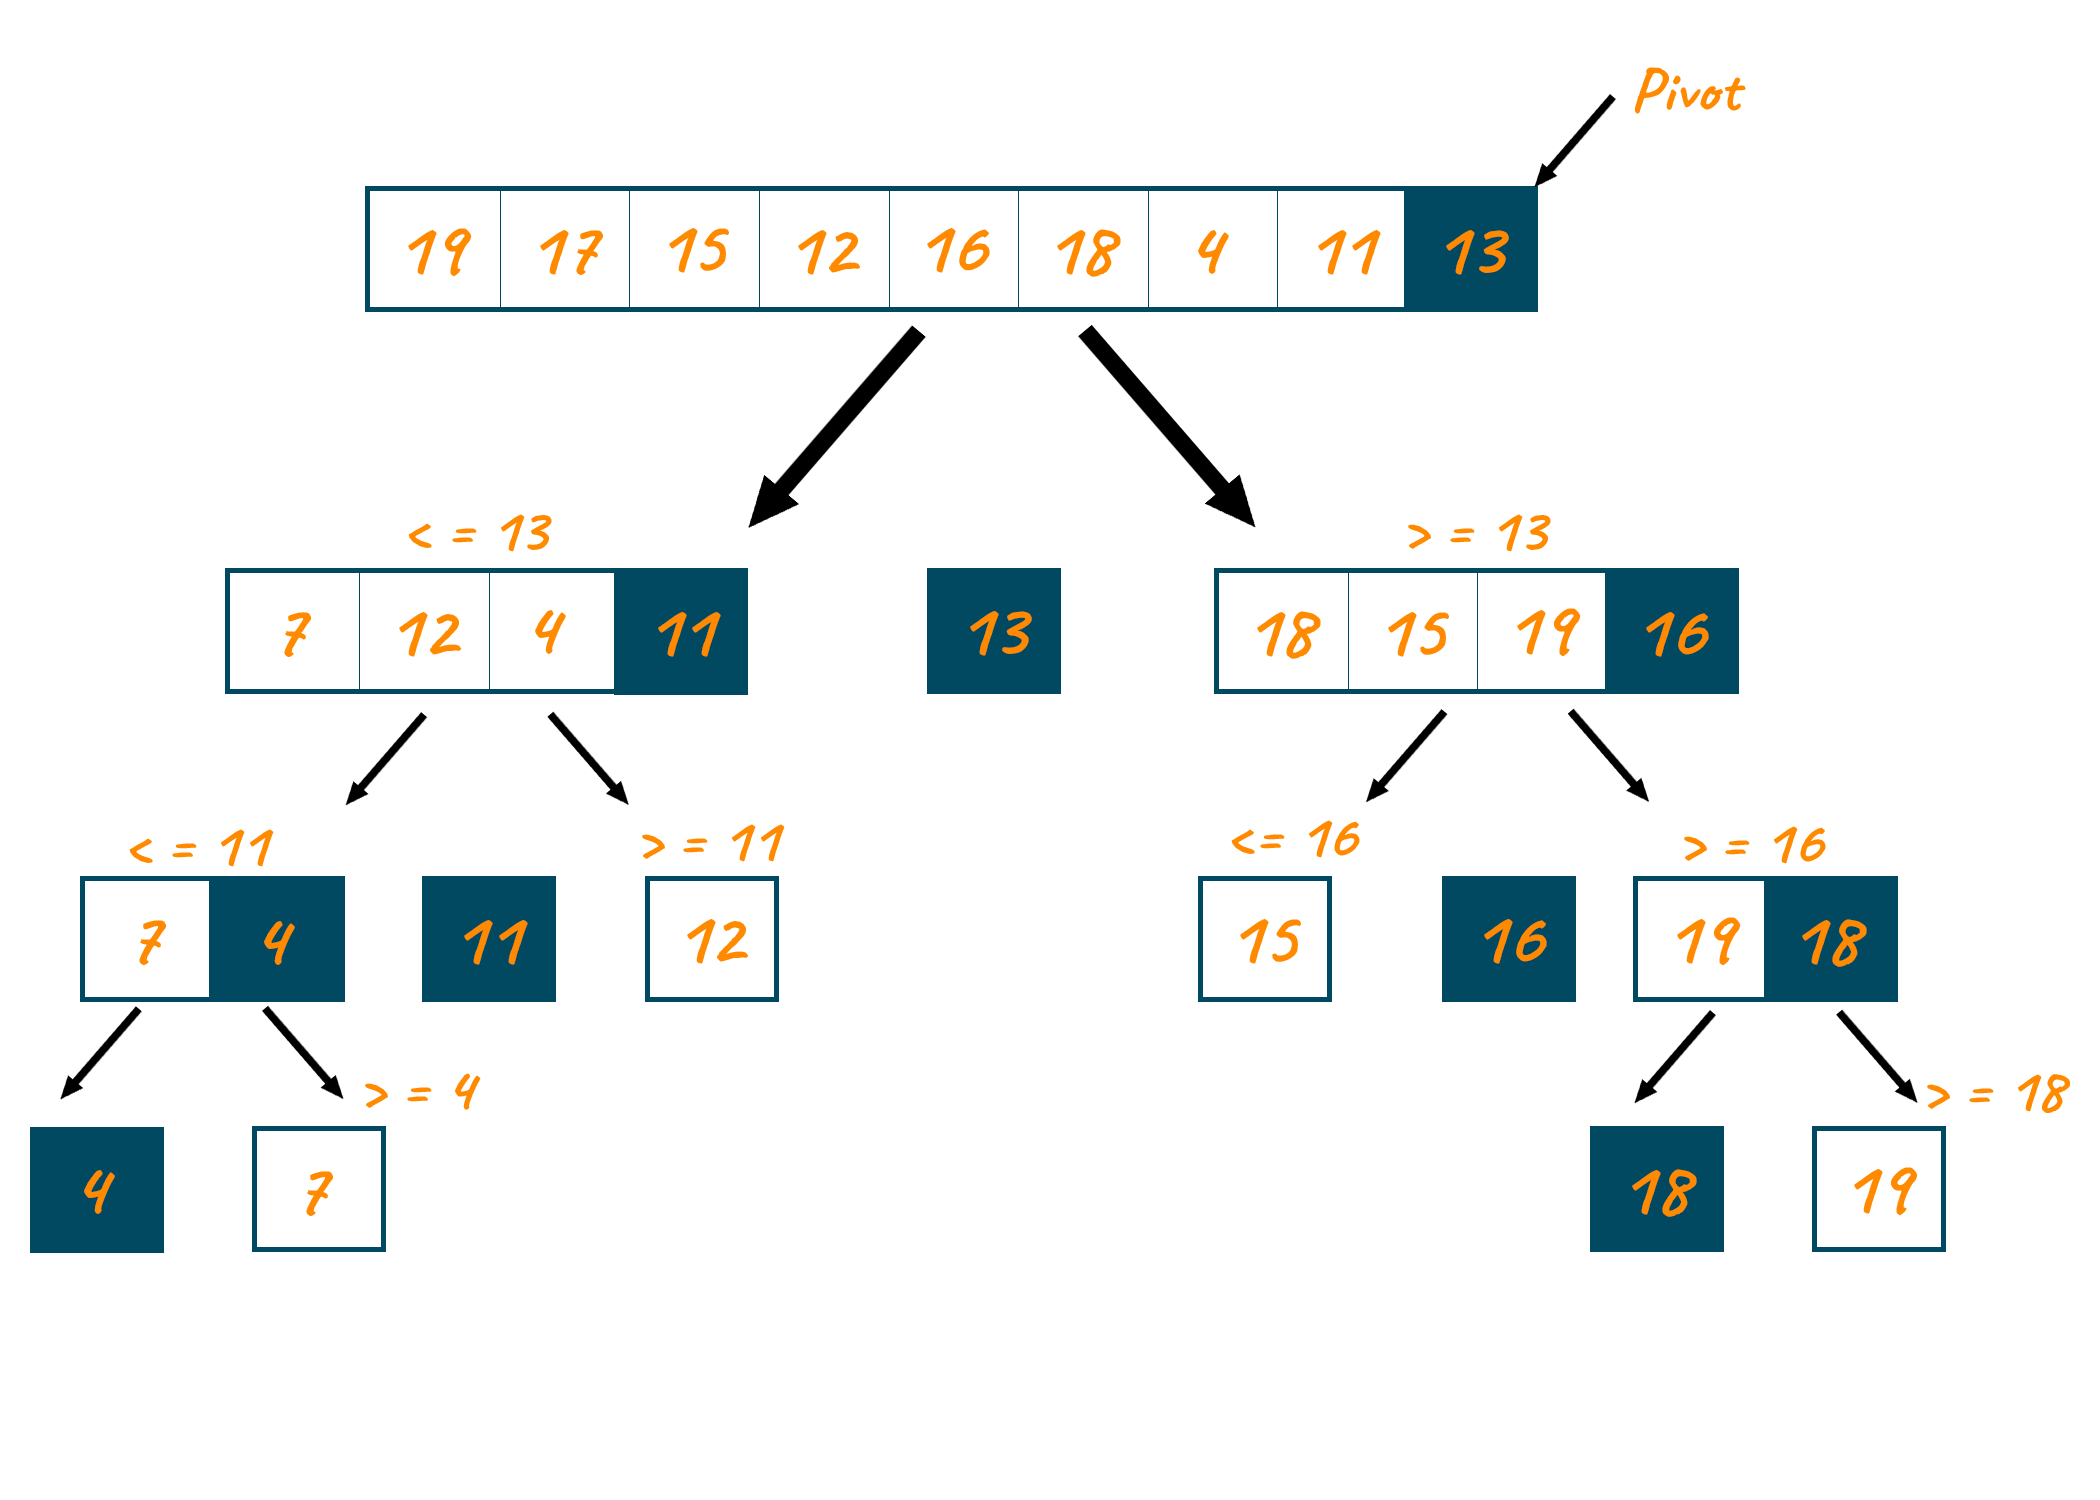


# 2.Algoritmo
A continuacion se mostrara el funcionamiento tanto del **Partition** como de **QuickSort**.


In [3]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [ ]:
"""Codigo Partition

def Partition1(a):
  i = -1
  j = 0
  pivote = int (len(a) - 1)
  while (True):
    if a[j] > a[pivote]:
      j = j + 1
    else:
      i = i + 1
      a[i], a[j] = a[j], a[i]
      j = j + 1

    if j == len(a):
      a[i + 1], a[pivote] = a[pivote], a[i+1] 
      break
  
  return a"""


In [1]:
#Codigo Partition cuando el pivote se enceuntre en el comienzo.

def Partition1(a, low, high, verbose):
  pivote = a[low]
  a[low],a[high] = a[high],a[low]
  i = low - 1

  if verbose:
    print("Pivote:", (colored(f"{str(a[high])}","red")))
  for j in range (low, high):
    if verbose:
      print(a)
      print("Numero comparado con el pivote",(colored(f"{str(a[j])}","green")))

    if a[j] <= pivote:
      if verbose:
        print("Debido a que el numero comparado es menor al pivote se realiza un cambio")
        print("Numeros Intercambiados:", a[i+1],"->", a[j])

      i = i + 1
      a[i], a[j] = a[j], a[i]
      
    if verbose:
      print("")

  a[i + 1], a[high] = a[high], a[i+1] 

  if verbose:
    print((colored(f"{str(a[:])}","blue")))
    print("Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha")
    print("Vuelta Finalizada")
    print("")
  return i + 1




In [2]:
#Codigo Partition para cuando el pivote se encuentre al final.

def Partition2(a, low, high, verbose, cont):
  pivote = a[low]
  i = low - 1

  if verbose:
    print("Pivote:", (colored(f"{str(a[high])}","red")))
  for j in range (low, high):
    if verbose:
      print(a)
      print("Numero comparado con el pivote",(colored(f"{str(a[j])}","green")))

    if a[j] <= pivote:
      if verbose:
        print("Debido a que el numero comparado es menor al pivote se realiza un cambio")
        print("Numeros Intercambiados:", a[i+1],"->", a[j])
      cont = cont + 1
      i = i + 1
      a[i], a[j] = a[j], a[i]
      
    if verbose:
      print("")

  a[i + 1], a[high] = a[high], a[i+1] 

  if verbose:
    print((colored(f"{str(a[:])}","blue")))
    print("Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha")
    print("Vuelta Finalizada")
    print("")
  return i + 1, cont







In [12]:
#Codigo Partition para cuando el pivote se encuentre al final.

def Partition3(a, low, high, verbose, cont):

  for k in range(0,2):
    numero = rd.choice(a)
  pivote = numero
  i = low - 1

  if verbose:
    print("Pivote:", (colored(f"{str(a[high])}","red")))
  for j in range (low, high):
    if verbose:
      print(a)
      print("Numero comparado con el pivote",(colored(f"{str(a[j])}","green")))

    if a[j] <= pivote:
      if verbose:
        print("Debido a que el numero comparado es menor al pivote se realiza un cambio")
        print("Numeros Intercambiados:", a[i+1],"->", a[j])
      cont = cont + 1
      i = i + 1
      a[i], a[j] = a[j], a[i]
      
    if verbose:
      print("")

  a[i + 1], a[high] = a[high], a[i+1] 

  if verbose:
    print((colored(f"{str(a[:])}","blue")))
    print("Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha")
    print("Vuelta Finalizada")
    print("")
  return i + 1, cont

In [8]:
#Codigo QuickSort

def QuickSort(a, low, high, verbose = False, cont = 0):
  if low < high:
    pivote, cont = Partition3(a, low, high,verbose, cont)
    cont = QuickSort(a, low, pivote - 1,verbose, cont)
    cont = QuickSort(a, pivote + 1, high,verbose, cont)
  return cont
    

# 2.2. Descripcion del algoritmo
El algoritmo recibe un conjunto de numeros aleatorios en un arreglo y devuelve como resultado un arreglo ordenado con numeros de menor a mayor.

1. Para comenzar a trabajar el algoritmo mediante la funcion Partition ordena el arreglo con los numeros menor al pivote a la izquierda y mayores que el a la derecha.

2. El proceso realizado por Partition nos deja un arreglo que a continuacion es partido a la mitad.

3. Tras esto se llama a la funcion QuickSort para que ordene el arreglo.

# 2.3. Ejemplo
a = $[8,10,4,3,11,9,7]$
Si el numero es menor que el pivote este sera cambiado por la posicion en que se enceuntre $i$ en caso contrario solo $j$ aumentara.

Se elige como pivote la ultima posicion del arreglo en este caso el numero 7.

 $[8,10,4,3,11,9,7]$
 
 i = a[-1]
 j = a[0]

Debido a que tanto el numero 8 como el 10 son mayores que el 7 no ocurre ningun cambio y solo aumenta el indice $j$.

 $[8,10,4,3,11,9,7]$
 
 i = a[-1]
 j = a[1]

Como se puede ver el numero 4 es menor al 7 por lo que se genera un cambio entre la posicion $a[i + 1]$ y la posicion $a[j]$.

 $[4,10,8,3,11,9,7]$
 
 i = a[0]
 j = a[2]

Como el 3 es menor se genera un cambio entre la posicion $a[i + 1]$ y la posicion $a[j]$.

 $[4,3,8,10,11,9,7]$
 
 i = a[1]
 j = a[3]

Debido a que el 11 es menor al pivote no se genera un cambio.

 $[4,3,8,10,11,9,7]$
 
 i = a[1]
 j = a[4]

Debido a que el 9 es mayor y no hay mas comparaciones por realizarse el pivote es insertado en la posicion $a[i + 1]$.

 $[4,3,7,8,10,11,9]$

Dejando asi un arreglo con los menores al pivote a la izquierda y mayores a la derecha.

Se procede a utilizar la funcion QuickSort que ordena el arreglo antes mencionado.

 $[3,4,7,8,9,10,11]$



# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

In [13]:
#Codigo QuickSort
a = [3,2,8,1,5]
print("Arreglo: ",a)
cont = 0
cont = QuickSort(a, 0, len(a) - 1, True, cont)
print("Arreglo Ordenado:",a, "Comparaciones :", cont)





Arreglo:  [3, 2, 8, 1, 5]
Pivote: 5
[3, 2, 8, 1, 5]
Numero comparado con el pivote 3
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 3 -> 3

[3, 2, 8, 1, 5]
Numero comparado con el pivote 2
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 2 -> 2

[3, 2, 8, 1, 5]
Numero comparado con el pivote 8

[3, 2, 8, 1, 5]
Numero comparado con el pivote 1
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 8 -> 1

[3, 2, 1, 5, 8]
Todo lo menor al pivote ha quedado a la izquierda y lo mayor a la derecha
Vuelta Finalizada

Pivote: 1
[3, 2, 1, 5, 8]
Numero comparado con el pivote 3
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 3 -> 3

[3, 2, 1, 5, 8]
Numero comparado con el pivote 2
Debido a que el numero comparado es menor al pivote se realiza un cambio
Numeros Intercambiados: 2 -> 2

[3, 2, 1, 5, 8]
Todo lo m

En cada iteracion se recorre:

*   Elemento de la lista

Color Azul: Arreglo tras finalizar las iteraciones.

Color Rojo: Pivote acutal del arreglo.

Color Verde: Numero con el que el pivote se esta comparando.


# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

Peor caso.

## Prueba del teorema

# 4. Correctitud

### **Teorema (Correctitud).**

## Prueba del Teorema

**Inicializacion**

**Mantencion**

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

### Análisis de resultados

#5.2. Tiempo de ejecucion (experimental)

**Analisis de resultados**